### Import Libraries


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.compose import ColumnTransformer





### *Set Display Option to show Max Row and Columns*

In [3]:
pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)



### READING DATASET

In [4]:
admissions = pd.read_csv(r"C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Med_Optix\Med_Optix\DataCleaning\admissions.csv")
daily_metrics = pd.read_csv(r"C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Med_Optix\Med_Optix\DataCleaning\daily_metrics.csv")
hospitals = pd.read_csv(r"C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Med_Optix\Med_Optix\DataCleaning\hospitals.csv")
wards = pd.read_csv(r"C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Med_Optix\Med_Optix\DataCleaning\wards.csv")

In [5]:
def eda_stage_1(dataframe, name):
  print(f"{name} dataframe information")
  print("="*60)
  print(dataframe.info())
  print("\n")
  print(f"{name} missing values information")
  print("="*60)
  print(dataframe.isnull().sum())
  print("\n")
  print(f"{name} describtion information")
  print("="*60)
  print(dataframe.describe())
  print(f'Structure of {name} dataset')
  print('='*60)
  print(f"Row:{dataframe.shape[0]}, Columns:{dataframe.shape[1]}")

### Exploratory Data Analysis Stage 1

#### Admisssion EDA Stage 1

In [6]:
admissions.head()

,admission_id,date,hospital_id,ward_code,arrival_source,triage_level,wait_minutes,length_of_stay_days,outcome,age,sex,procedure_flag
0,1,2022-10-28,1,ED,referral,4.0,189,0,discharged,48,M,0
1,2,2022-10-28,1,ED,ambulance,4.0,189,0,transferred,93,F,0
2,3,2022-10-28,1,ED,self,2.0,189,0,discharged,52,M,0
3,4,2022-10-28,1,ED,self,3.0,189,0,discharged,64,M,0
4,5,2022-10-28,1,ED,self,4.0,189,0,discharged,59,M,0


In [7]:
eda_stage_1(admissions, name='admissions')

admissions dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194096 entries, 0 to 194095
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   admission_id         194096 non-null  int64  
 1   date                 194096 non-null  object 
 2   hospital_id          194096 non-null  int64  
 3   ward_code            194096 non-null  object 
 4   arrival_source       194096 non-null  object 
 5   triage_level         65700 non-null   float64
 6   wait_minutes         194096 non-null  int64  
 7   length_of_stay_days  194096 non-null  int64  
 8   outcome              194096 non-null  object 
 9   age                  194096 non-null  int64  
 10  sex                  194096 non-null  object 
 11  procedure_flag       194096 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.8+ MB
None


admissions missing values information
admission_id                0
date

### *Daily Metric DataFrame*

In [8]:
daily_metrics.head()


,date,hospital_id,ward_code,base_beds,effective_capacity,occupancy,overflow,admissions,discharges,staffing_index,avg_wait_minutes,admission_rate_per_bed,discharge_rate_per_bed,occupancy_rate
0,2022-10-28,1,ED,30,34,34,26,51,17,0.999,219,1.700,0.567,1.0
1,2022-10-29,1,ED,30,34,34,35,62,31,0.938,223,2.067,1.033,1.0
2,2022-10-30,1,ED,30,34,34,39,63,28,0.953,275,2.100,0.933,1.0
3,2022-10-31,1,ED,30,34,34,26,56,34,0.974,227,1.867,1.133,1.0
4,2022-11-01,1,ED,30,34,34,29,55,30,1.013,257,1.833,1.000,1.0


In [9]:
daily_metrics.tail()

,date,hospital_id,ward_code,base_beds,effective_capacity,occupancy,overflow,admissions,discharges,staffing_index,avg_wait_minutes,admission_rate_per_bed,discharge_rate_per_bed,occupancy_rate
21895,2025-10-22,5,SURG,40,46,46,15,26,17,0.944,197,0.650,0.425,1.000
21896,2025-10-23,5,SURG,40,46,46,9,20,17,0.962,214,0.500,0.425,1.000
21897,2025-10-24,5,SURG,40,46,43,3,15,18,0.957,154,0.375,0.450,0.935
21898,2025-10-25,5,SURG,40,40,34,0,9,18,0.908,32,0.225,0.450,0.850
21899,2025-10-26,5,SURG,40,40,39,0,20,15,0.877,81,0.500,0.375,0.975


In [10]:
cv= admissions.groupby('sex')['arrival_source'].agg(lambda x: x.mode()[0])
cv

sex
F    self
M    self
Name: arrival_source, dtype: object

## Daily Metrics EDA Stage 1

In [11]:
eda_stage_1(daily_metrics, name='daily_metrics')

daily_metrics dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    21900 non-null  object 
 1   hospital_id             21900 non-null  int64  
 2   ward_code               21900 non-null  object 
 3   base_beds               21900 non-null  int64  
 4   effective_capacity      21900 non-null  int64  
 5   occupancy               21900 non-null  int64  
 6   overflow                21900 non-null  int64  
 7   admissions              21900 non-null  int64  
 8   discharges              21900 non-null  int64  
 9   staffing_index          21900 non-null  float64
 10  avg_wait_minutes        21900 non-null  int64  
 11  admission_rate_per_bed  21900 non-null  float64
 12  discharge_rate_per_bed  21900 non-null  float64
 13  occupancy_rate          21900 non-null  float64
dtypes:

### *Hospitals DataFrame*

In [12]:
hospitals.head()

,hospital_id,hospital_name,city,country,latitude,longitude,founded_year
0,1,Helsinki Central Hospital,Helsinki,Finland,63.6698,25.0721,1979
1,2,Tampere City Hospital,Tampere,Finland,63.2868,22.6592,2008
2,3,Turku University Hospital,Turku,Finland,64.6781,27.3280,1998
3,4,Oulu Regional Hospital,Oulu,Finland,60.4406,25.1527,2003
4,5,Kuopio Medical Center,Kuopio,Finland,61.6540,28.4874,2003


## Hospitals EDA Stage 1

In [13]:
eda_stage_1(hospitals, name='hospitals')

hospitals dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hospital_id    5 non-null      int64  
 1   hospital_name  5 non-null      object 
 2   city           5 non-null      object 
 3   country        5 non-null      object 
 4   latitude       5 non-null      float64
 5   longitude      5 non-null      float64
 6   founded_year   5 non-null      int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 412.0+ bytes
None


hospitals missing values information
hospital_id      0
hospital_name    0
city             0
country          0
latitude         0
longitude        0
founded_year     0
dtype: int64


hospitals describtion information
       hospital_id   latitude  longitude  founded_year
count     5.000000   5.000000   5.000000      5.000000
mean      3.000000  62.745860  25.739880   1998.200000
std       1.58

### *Wards DataFrame*

In [14]:
wards.head()

,hospital_id,ward_id,ward_code,ward_name,base_beds
0,1,01-ED,ED,Emergency Department,30
1,1,01-ICU,ICU,Intensive Care Unit,20
2,1,01-MED,MED,General Medicine,50
3,1,01-SURG,SURG,Surgery,40
4,2,02-ED,ED,Emergency Department,30


In [15]:
eda_stage_1(wards, name='wards')

wards dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hospital_id  20 non-null     int64 
 1   ward_id      20 non-null     object
 2   ward_code    20 non-null     object
 3   ward_name    20 non-null     object
 4   base_beds    20 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 932.0+ bytes
None


wards missing values information
hospital_id    0
ward_id        0
ward_code      0
ward_name      0
base_beds      0
dtype: int64


wards describtion information
       hospital_id  base_beds
count    20.000000  20.000000
mean      3.000000  35.000000
std       1.450953  11.470787
min       1.000000  20.000000
25%       2.000000  27.500000
50%       3.000000  35.000000
75%       4.000000  42.500000
max       5.000000  50.000000
Structure of wards dataset
Row:20, Columns:5


## *Exploratory Data Analysis Stage 2*

In [16]:
# Set up plotting style for better visuals
plt.style.use('default')
sns.set_palette("husl")

print("Data loaded successfully!")


Data loaded successfully!


In [17]:
# Cell 2: Basic Overview - Data Summary
print("=== BASIC DATA OVERVIEW ===")

print("\n Ward Code Distribution:")
print(admissions['ward_code'].value_counts())
print('='*60)

print("\nArrival Distribution:")
print(admissions["arrival_source"].value_counts())
print('='*60)

print("\n Length of Days of Admission Distribution")
print(admissions["length_of_stay_days"].value_counts())
print('='*60)
print("\n Outcome Distribution")
print(admissions["outcome"].value_counts())
print('='*60)
print("\n Triage Level Distribution")
print(admissions["triage_level"].value_counts())
print('='*60)
print('\n Average Wait Time Distribution')
average_wait = admissions.groupby('hospital_id')['wait_minutes'].mean().reset_index()
print(average_wait)
print('='*60)
print(f"Average Wait Minutes: {admissions['wait_minutes'].mean(skipna=True):.0f} mins")


=== BASIC DATA OVERVIEW ===

 Ward Code Distribution:
ward_code
ED      65700
MED     43800
SURG    43787
ICU     40809
Name: count, dtype: int64

Arrival Distribution:
arrival_source
self         116379
ambulance     35032
referral      29142
transfer      13543
Name: count, dtype: int64

 Length of Days of Admission Distribution
length_of_stay_days
0     65700
1     22429
3     19423
4     18912
2     16497
5     15453
6     11313
7      7971
8      5660
9      4086
10     2838
11     1854
12     1042
13      546
14      227
15       93
16       31
17       14
18        6
20        1
Name: count, dtype: int64

 Outcome Distribution
outcome
discharged     182459
readmit_30d      5197
transferred      5126
death            1314
Name: count, dtype: int64

 Triage Level Distribution
triage_level
3.0    26283
4.0    19789
2.0     9923
5.0     6547
1.0     3158
Name: count, dtype: int64

 Average Wait Time Distribution
   hospital_id  wait_minutes
0            1    194.497343
1            

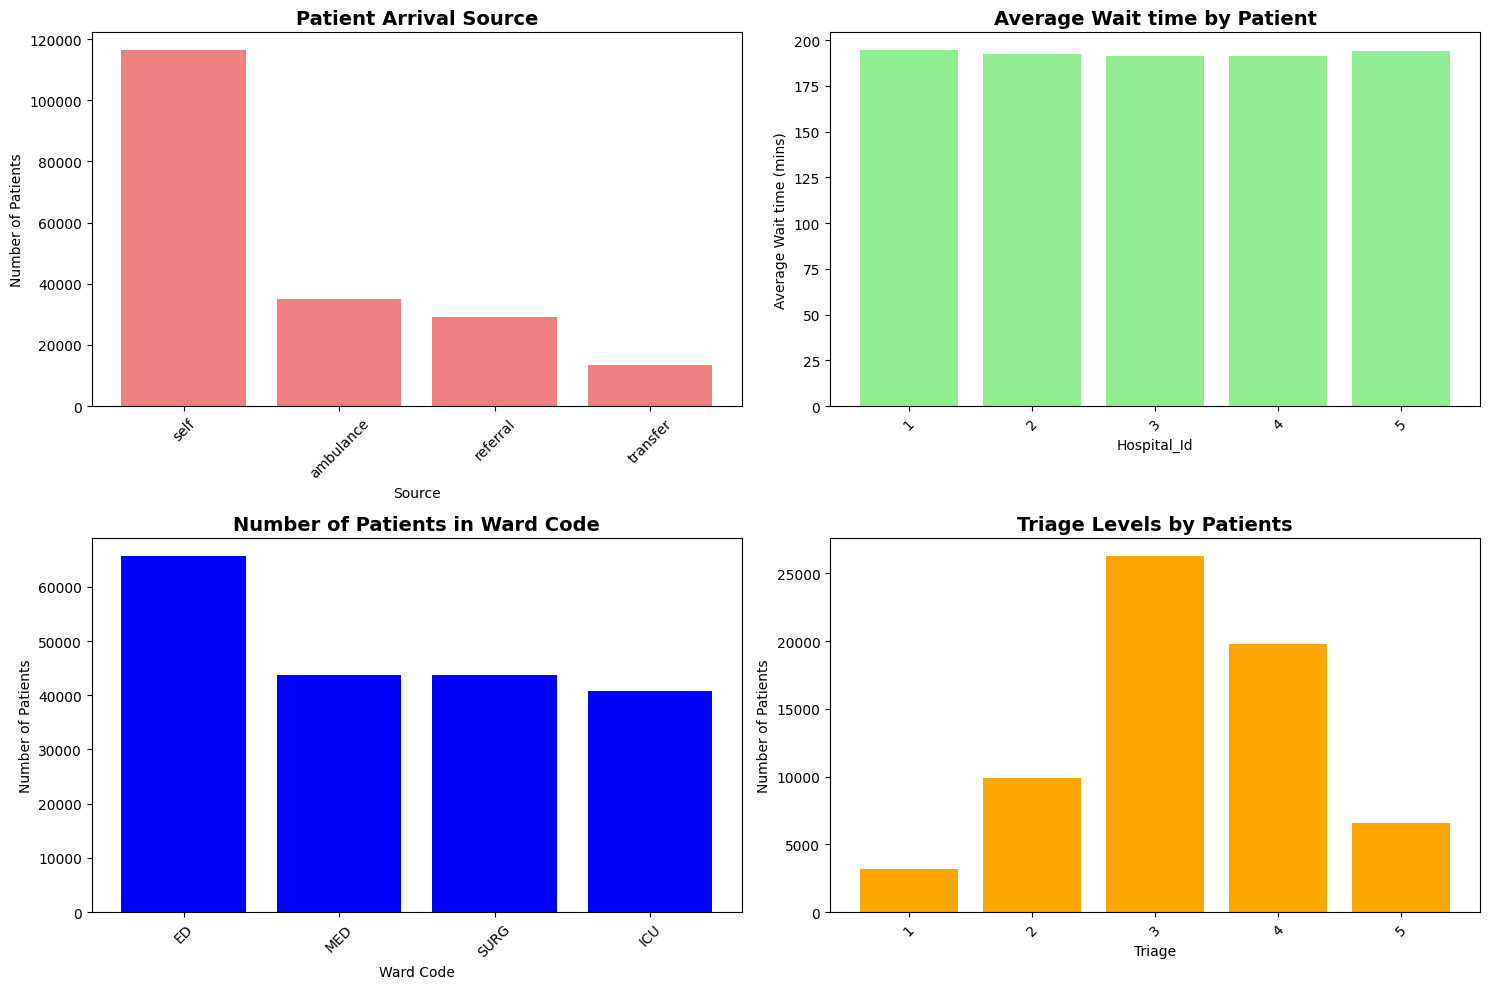

In [18]:
# Cell 4: Regional Store Distribution - Bar Charts
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
arrival_source = admissions['arrival_source'].value_counts()
plt.bar(arrival_source.index, arrival_source.values, color='lightcoral')
plt.title('Patient Arrival Source', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
average_wait = admissions.groupby('hospital_id')['wait_minutes'].mean().sort_values(ascending=False)
plt.bar(average_wait.index, average_wait.values, color='lightgreen')
plt.title('Average Wait time by Patient', fontsize=14, fontweight='bold')
plt.xlabel('Hospital_Id')
plt.ylabel('Average Wait time (mins)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
ward_code = admissions['ward_code'].value_counts()
plt.bar(ward_code.index, ward_code.values, color='blue')
plt.title('Number of Patients in Ward Code', fontsize=14, fontweight='bold')
plt.xlabel('Ward Code')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)

triage_levels = admissions['triage_level'].value_counts()
plt.bar(triage_levels.index, triage_levels.values, color='orange')
plt.title('Triage Levels by Patients', fontsize=14, fontweight='bold')
plt.xlabel('Triage')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [19]:
admissions.columns

Index(['admission_id', 'date', 'hospital_id', 'ward_code', 'arrival_source',
       'triage_level', 'wait_minutes', 'length_of_stay_days', 'outcome', 'age',
       'sex', 'procedure_flag'],
      dtype='object')

In [20]:
admissions['ward_code'].value_counts()

ward_code
ED      65700
MED     43800
SURG    43787
ICU     40809
Name: count, dtype: int64

In [21]:
daily_metrics.columns

Index(['date', 'hospital_id', 'ward_code', 'base_beds', 'effective_capacity',
       'occupancy', 'overflow', 'admissions', 'discharges', 'staffing_index',
       'avg_wait_minutes', 'admission_rate_per_bed', 'discharge_rate_per_bed',
       'occupancy_rate'],
      dtype='object')

In [22]:
daily_metrics['ward_code'].value_counts()

ward_code
ED      5475
ICU     5475
MED     5475
SURG    5475
Name: count, dtype: int64

In [23]:

merged_df = admissions.merge(daily_metrics, on=['hospital_id', 'date','ward_code'], how='left')

In [24]:
merged_df.head()

,admission_id,date,hospital_id,ward_code,arrival_source,triage_level,wait_minutes,length_of_stay_days,outcome,age,sex,procedure_flag,base_beds,effective_capacity,occupancy,overflow,admissions,discharges,staffing_index,avg_wait_minutes,admission_rate_per_bed,discharge_rate_per_bed,occupancy_rate
0,1,2022-10-28,1,ED,referral,4.0,189,0,discharged,48,M,0,30,34,34,26,51,17,0.999,219,1.7,0.567,1.0
1,2,2022-10-28,1,ED,ambulance,4.0,189,0,transferred,93,F,0,30,34,34,26,51,17,0.999,219,1.7,0.567,1.0
2,3,2022-10-28,1,ED,self,2.0,189,0,discharged,52,M,0,30,34,34,26,51,17,0.999,219,1.7,0.567,1.0
3,4,2022-10-28,1,ED,self,3.0,189,0,discharged,64,M,0,30,34,34,26,51,17,0.999,219,1.7,0.567,1.0
4,5,2022-10-28,1,ED,self,4.0,189,0,discharged,59,M,0,30,34,34,26,51,17,0.999,219,1.7,0.567,1.0


In [25]:
merged_df.columns

Index(['admission_id', 'date', 'hospital_id', 'ward_code', 'arrival_source',
       'triage_level', 'wait_minutes', 'length_of_stay_days', 'outcome', 'age',
       'sex', 'procedure_flag', 'base_beds', 'effective_capacity', 'occupancy',
       'overflow', 'admissions', 'discharges', 'staffing_index',
       'avg_wait_minutes', 'admission_rate_per_bed', 'discharge_rate_per_bed',
       'occupancy_rate'],
      dtype='object')

In [26]:
hospitals.columns

Index(['hospital_id', 'hospital_name', 'city', 'country', 'latitude',
       'longitude', 'founded_year'],
      dtype='object')

In [27]:
merged_df=merged_df.merge(hospitals, on='hospital_id', how='left')

In [28]:
merged_df.columns

Index(['admission_id', 'date', 'hospital_id', 'ward_code', 'arrival_source',
       'triage_level', 'wait_minutes', 'length_of_stay_days', 'outcome', 'age',
       'sex', 'procedure_flag', 'base_beds', 'effective_capacity', 'occupancy',
       'overflow', 'admissions', 'discharges', 'staffing_index',
       'avg_wait_minutes', 'admission_rate_per_bed', 'discharge_rate_per_bed',
       'occupancy_rate', 'hospital_name', 'city', 'country', 'latitude',
       'longitude', 'founded_year'],
      dtype='object')

In [29]:
wards.columns

Index(['hospital_id', 'ward_id', 'ward_code', 'ward_name', 'base_beds'], dtype='object')

In [30]:
merged_df = merged_df.merge(wards, on=['hospital_id','ward_code', 'base_beds'], how ='left')

In [31]:
merged_df.columns

Index(['admission_id', 'date', 'hospital_id', 'ward_code', 'arrival_source',
       'triage_level', 'wait_minutes', 'length_of_stay_days', 'outcome', 'age',
       'sex', 'procedure_flag', 'base_beds', 'effective_capacity', 'occupancy',
       'overflow', 'admissions', 'discharges', 'staffing_index',
       'avg_wait_minutes', 'admission_rate_per_bed', 'discharge_rate_per_bed',
       'occupancy_rate', 'hospital_name', 'city', 'country', 'latitude',
       'longitude', 'founded_year', 'ward_id', 'ward_name'],
      dtype='object')

In [32]:
eda_stage_1(merged_df, name='merged_df')

merged_df dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194096 entries, 0 to 194095
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   admission_id            194096 non-null  int64  
 1   date                    194096 non-null  object 
 2   hospital_id             194096 non-null  int64  
 3   ward_code               194096 non-null  object 
 4   arrival_source          194096 non-null  object 
 5   triage_level            65700 non-null   float64
 6   wait_minutes            194096 non-null  int64  
 7   length_of_stay_days     194096 non-null  int64  
 8   outcome                 194096 non-null  object 
 9   age                     194096 non-null  int64  
 10  sex                     194096 non-null  object 
 11  procedure_flag          194096 non-null  int64  
 12  base_beds               194096 non-null  int64  
 13  effective_capacity      194096 non-null  i

In [33]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [34]:
eda_stage_1(merged_df, name='merged_df')

merged_df dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194096 entries, 0 to 194095
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   admission_id            194096 non-null  int64         
 1   date                    194096 non-null  datetime64[ns]
 2   hospital_id             194096 non-null  int64         
 3   ward_code               194096 non-null  object        
 4   arrival_source          194096 non-null  object        
 5   triage_level            65700 non-null   float64       
 6   wait_minutes            194096 non-null  int64         
 7   length_of_stay_days     194096 non-null  int64         
 8   outcome                 194096 non-null  object        
 9   age                     194096 non-null  int64         
 10  sex                     194096 non-null  object        
 11  procedure_flag          194096 non-null  int64         
 12

In [38]:
num_cols = merged_df.select_dtypes(include=[np.number]).columns.to_list()
cat_cols = merged_df.select_dtypes(exclude=[np.number]).columns.to_list()

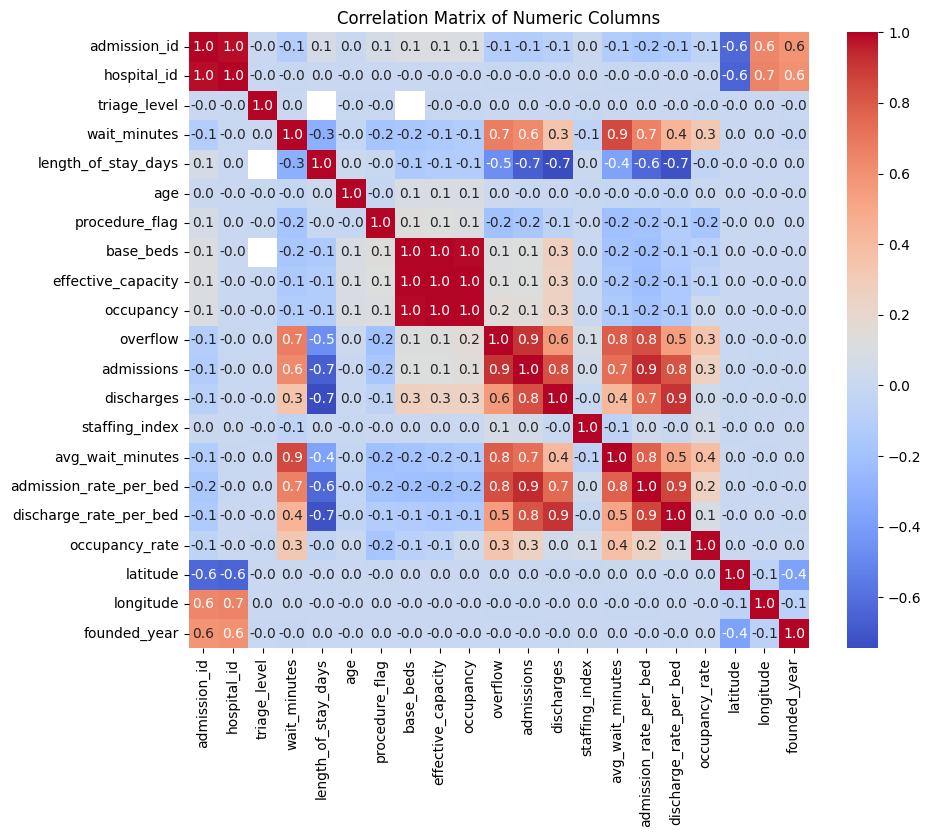

In [40]:
correlation_matrix = merged_df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()



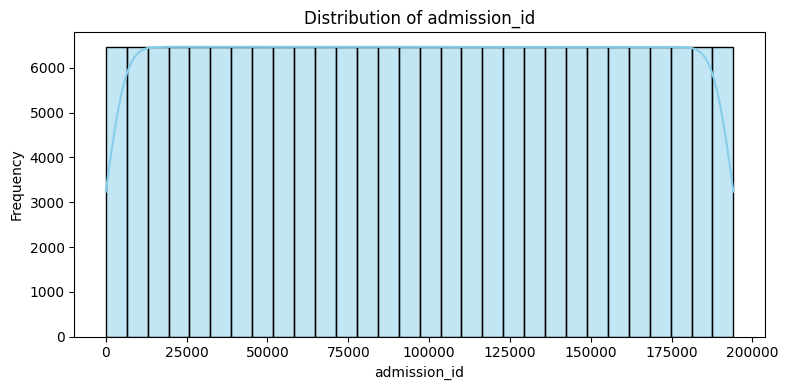

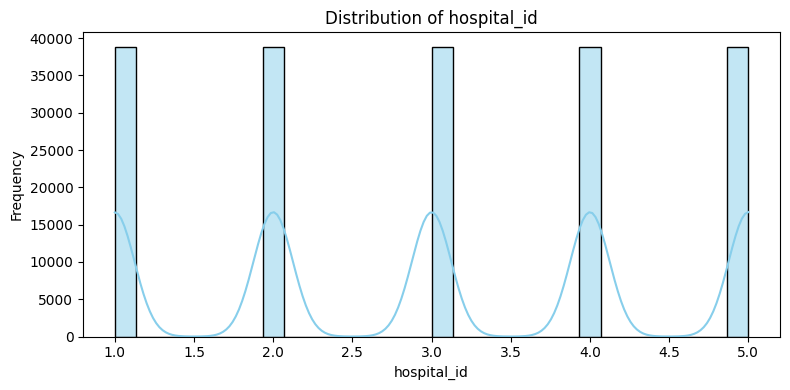

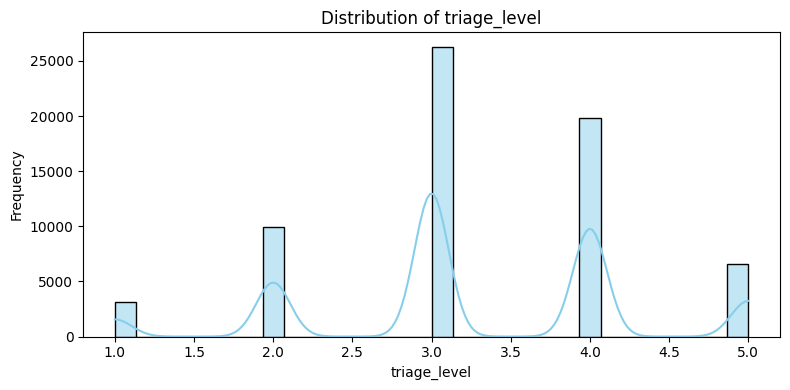

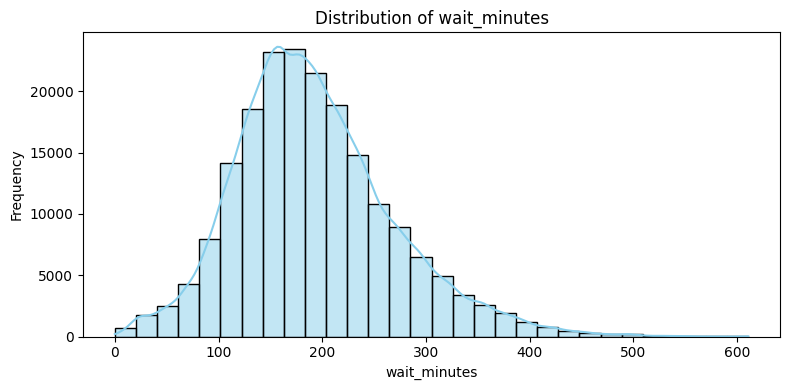

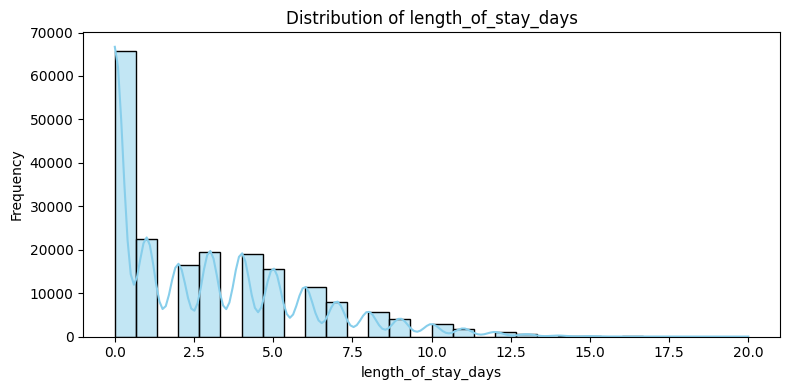

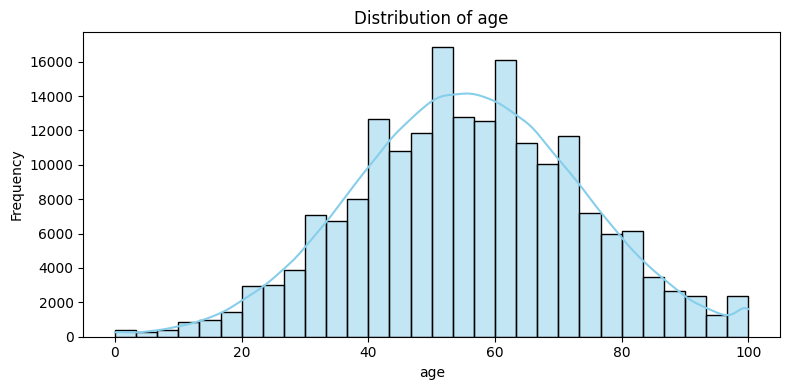

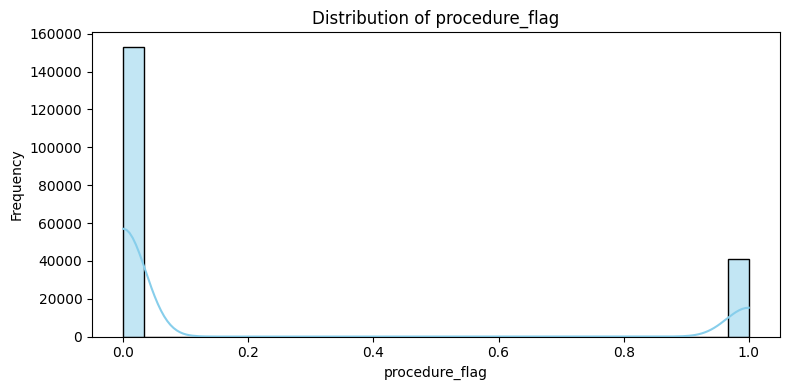

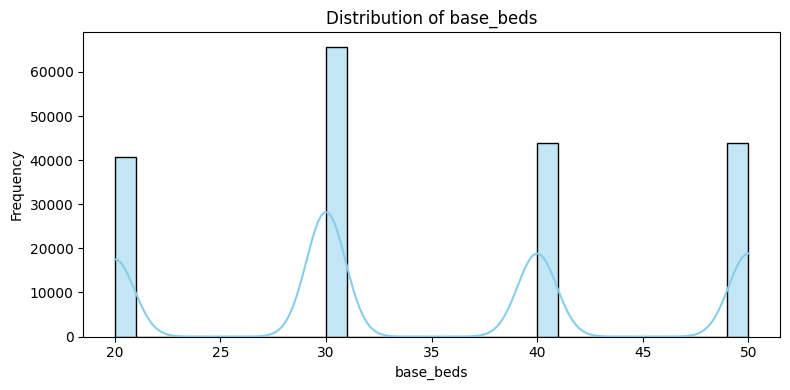

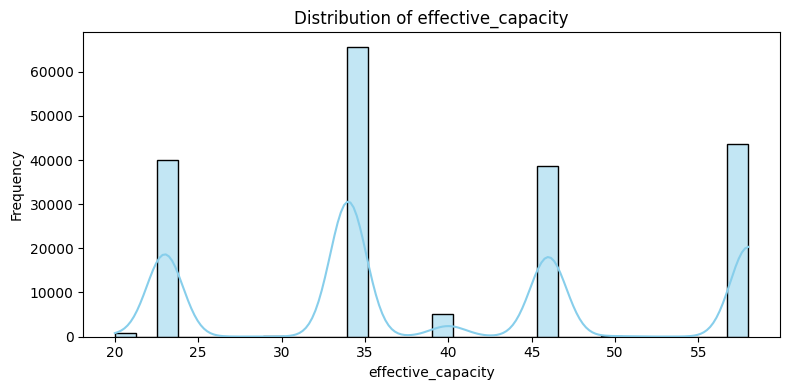

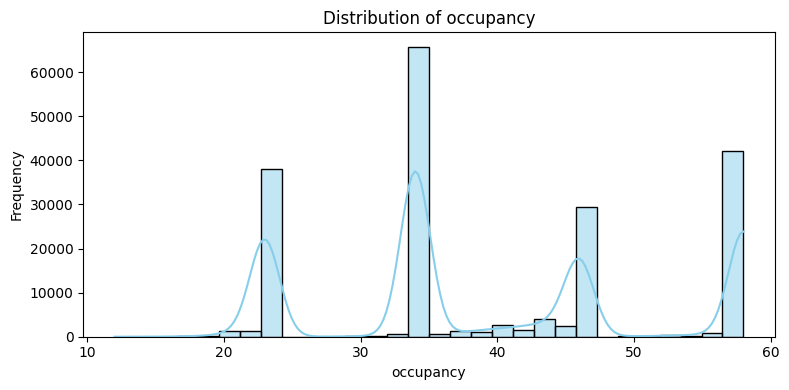

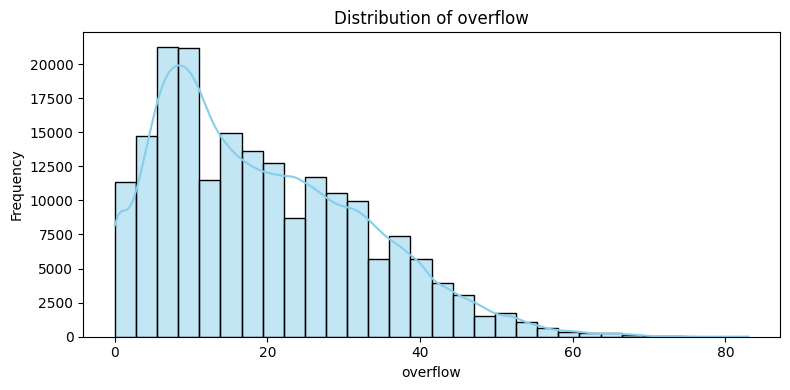

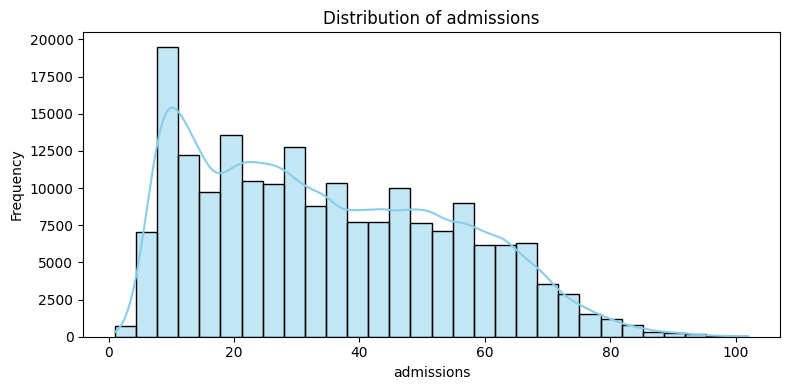

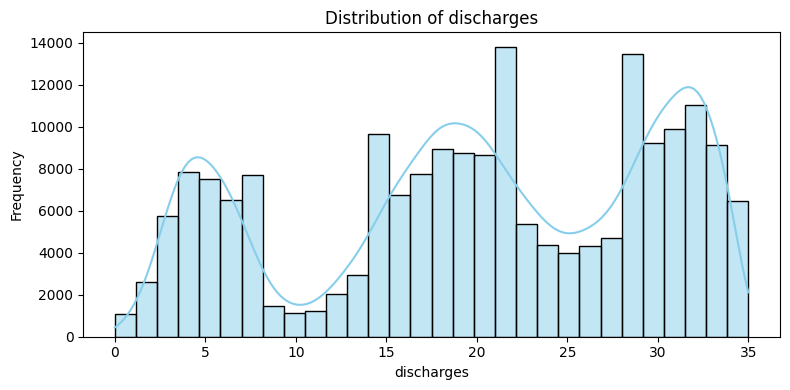

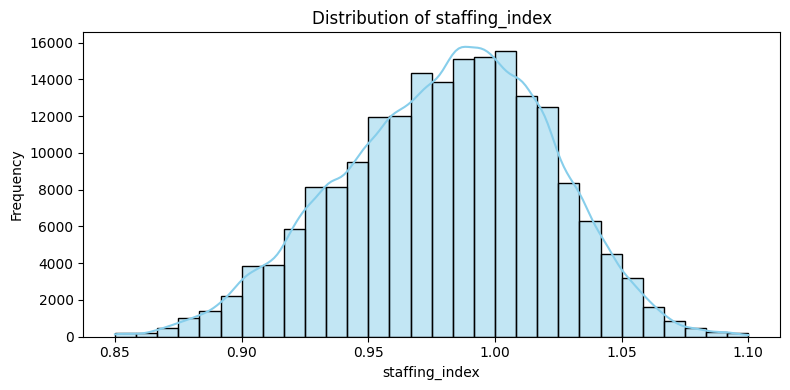

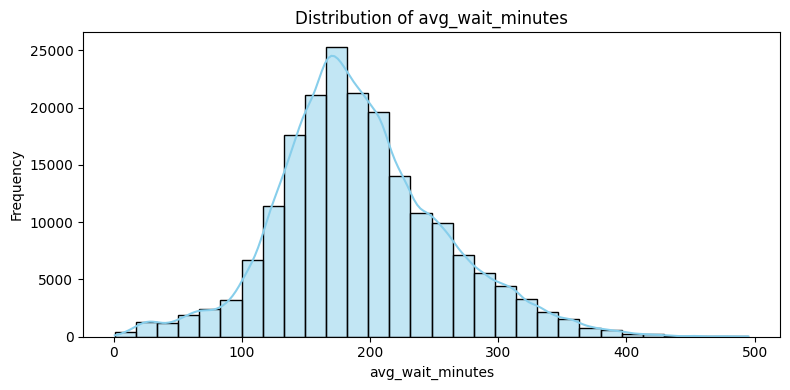

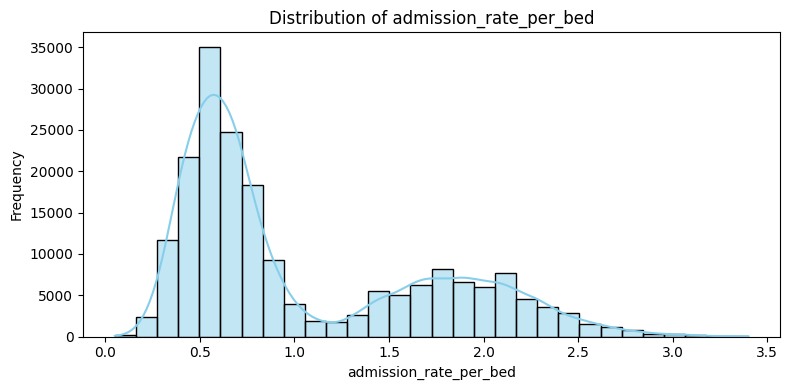

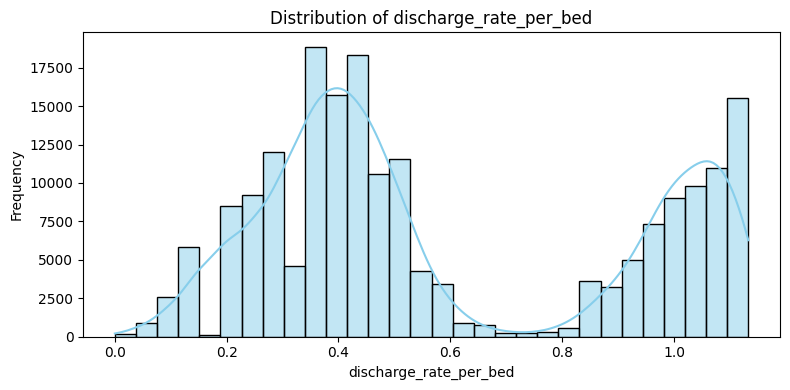

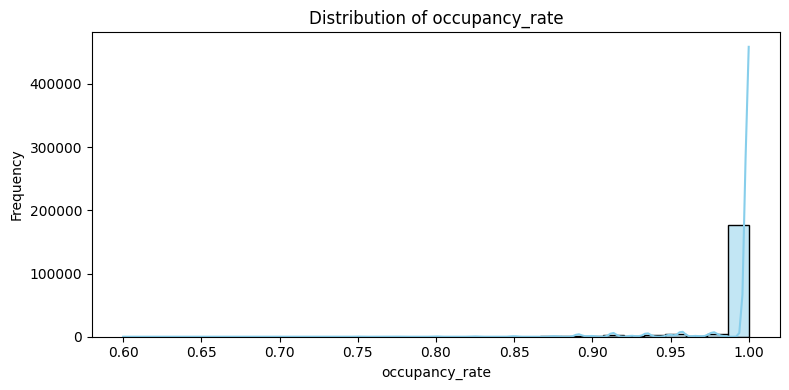

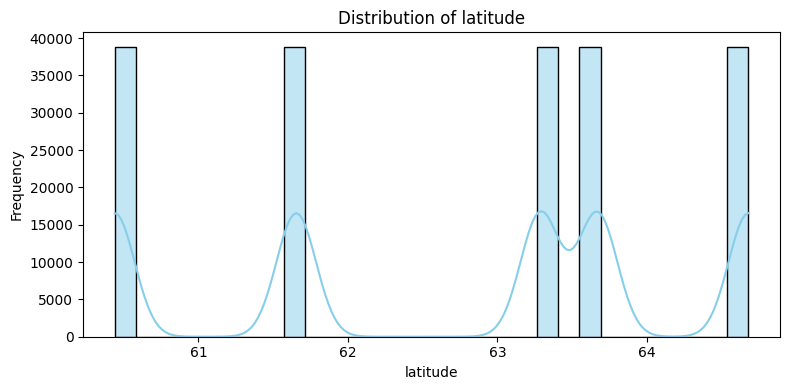

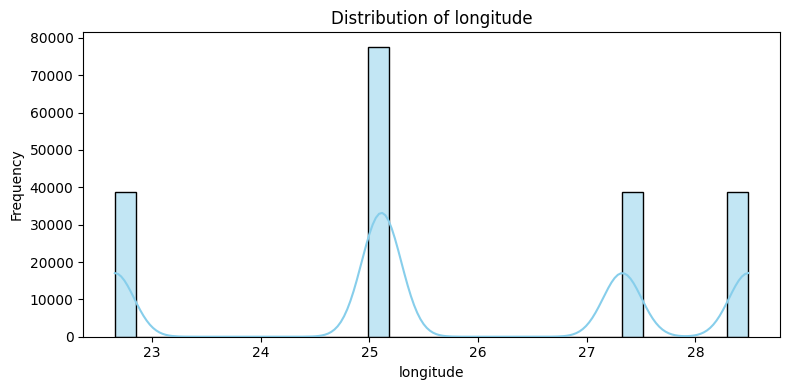

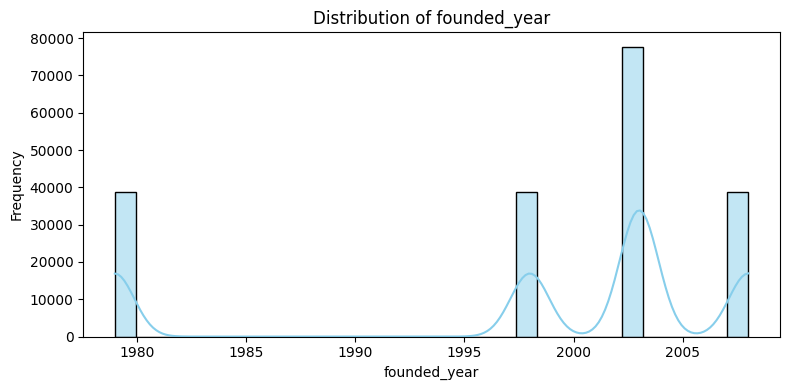

In [45]:


for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=merged_df, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()